# Lecture 02: Data Visualization: Bar plot

Submitted by:
<br>Nabila Tajrin Bristy
<br>Dhaka, Bangladesh

#### Objective
This project visualizes the data and analyzes the relationship between variables of used Ford cars.

#### Variables
model, year, price, transmission, mileage, fuelType, mpg, and engineSize.

#### The data has been visualized using:
barplot, histogram, ECDF etc.

#### Tasks:
- Create a figure of barplot that will contain multiple subplots. Each subplot will represent a column.
- Make sure you have a proper title, xlabel, ylabel, xticks, yticks, and figure size which will represent an example of good data visualization.
- Use the Markdown cell for proper commenting and make sure the code easily understandable. Use the .head() or .tail() method when necessary rather than displaying all the rows in the dataframe.
- Make sure your code is reusable and reproducible. 

#### References:
- dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

In [ ]:
# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
# read the ford.csv file 
df = pd.read_csv("ford.csv")

# check the first 5 rows
display(df.head())

# check the last 5 rows
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


# Function

In [3]:
#Declare reusable function

def unique_val_count(date, column):
    #data = name of the dataframes
    #column = name of the columns
    
    #count the values of the columns
    df_count = df[column].value_counts()
    
    #create separate dataframes of the columns
    df_count = pd.DataFrame(df_count)
    
    #reset the names of the columns to 'index'
    df_count = df_count.reset_index()
    
    #change the name of column name
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    
    #finding the % of cars for each column/dataframe
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100),2)
    
    return df_count

In [4]:
#Initiating new dataframes with the four columns of main dataframe 'Ford'
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fueltype_count = unique_val_count(df, 'fuelType')

In [5]:
#Sorting dataframe year_count in ascending order
year_count = year_count.sort_values(by = 'year')

### Bar plot

-data is the naming of dataframe<br>
-column_x will be in the x axis<br>
-rotation will rotate the labels if required<br>
-yticks is the range/bins/class-intervals of y axis<br>

In [6]:
#Creating barplots using seaborn
 def barplot(data, column_x, color, rotation, yticks):
        sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
        
        plt.title('Percentage of cars present for each ' + column_x)
        plt.xlabel(column_x)
        plt.ylabel('Percent of Cars (%)')
        #It will rotate if required
        plt.xticks(rotation=rotation)
        #yticks will be different for each dataframes
        plt.yticks(yticks)

Setting the layout of the graphs.

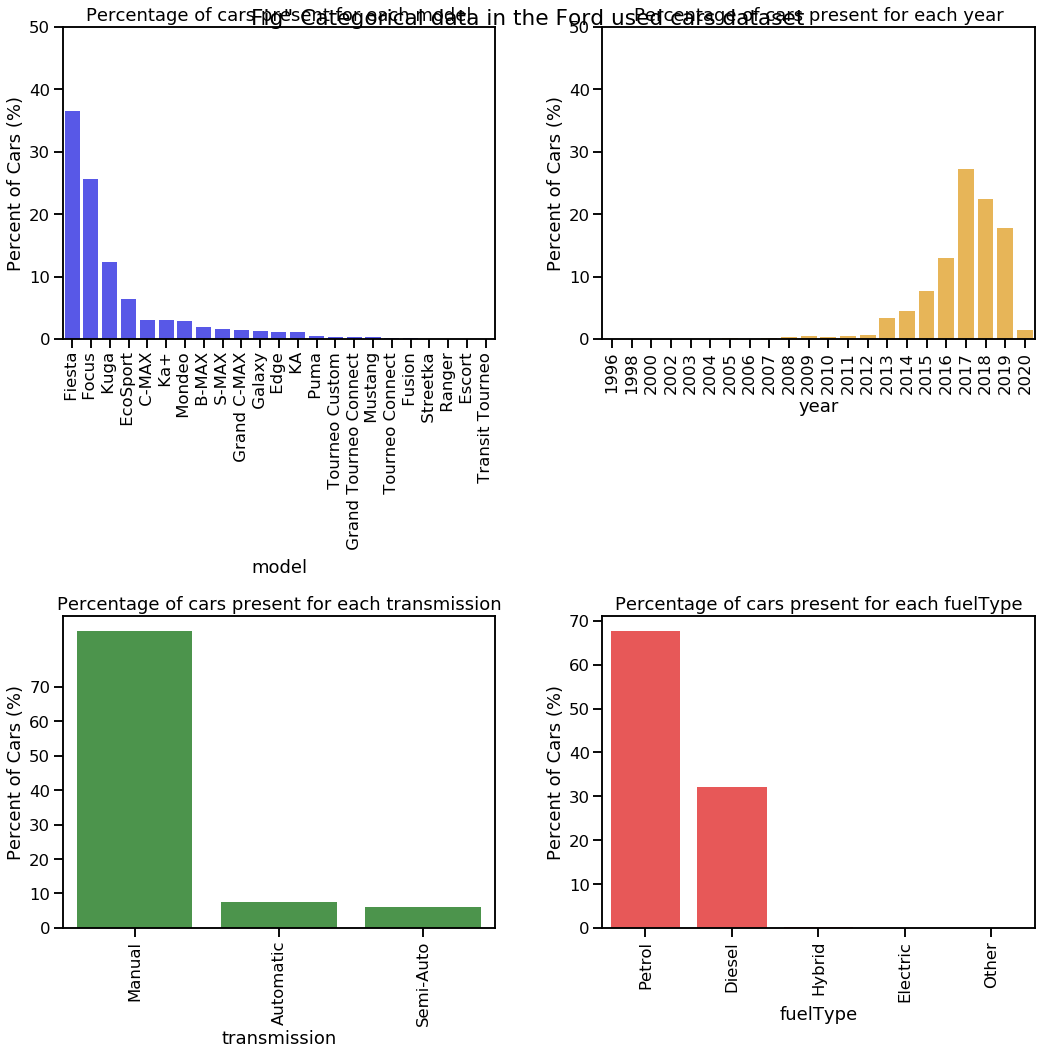

In [7]:
sns.color_palette('Set2')
sns.set_context('talk')
#Setting the size of the graphs.
plt.figure(figsize=(15,15))
#Creating subplots
#Combining multiple graphs and show them together. Using rows and columns numbers based on the graphs placement on the figure to position them correctly. There will be 4 graphs in 2 rows and 2 columns.

#Creating barplot
#barplot(data, column_x, color, rotation, yticks)
#Where,
#data= Dataframe/ model_count
#column_x will be in the x axis
#yticks is the range/bins/class-intervals of y axis
#Subplot 'model' will be in position 1 (i.e. 1st row, 1st column)
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))
#Subplot 'year' will be in position 2 (i.e. 1st row, 2nd column)
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))
#Subplot 'transmission' will be in position 3 (i.e. 2nd row, 1st column)
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))
#Subplot 'fuelType' will be in position 4 (i.e. 2nd row, 2nd column)
plt.subplot(2,2,4)
barplot(fueltype_count, 'fuelType', 'red', 0, np.arange(0,71,10))

#set title
plt.suptitle('Fig" Categorical data in the Ford used cars dataset')
#ignoring overlapping of the texts among graphs
plt.tight_layout()

plt.show()